# Series de Tiempo / Plot

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [207]:
csv_raw = pd.read_csv('Full_2020-2023.csv')
contaminante = 'CO'
df = csv_raw[['Datetime',contaminante]]

df.index = pd.to_datetime(df['Datetime'], format='%Y/%m/%d %H:%M:%S')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
#df.index = pd.to_datetime(df.index)
#print (df2['PM10'].mean())
#df = df2[['Datetime','PM10']]


In [208]:
df[contaminante].min(), df[contaminante].idxmin()

(-0.6, Timestamp('2022-09-17 03:00:00'))

In [209]:
df[contaminante].max(), df[contaminante].idxmax()

(9.98, Timestamp('2021-04-03 15:00:00'))

In [210]:
#csv_raw.head()

In [211]:
media_mensual = df[contaminante].resample('M').mean().abs()
#print(media_mensual)
media_mensual.to_csv(contaminante + '_media_mensual.csv')

In [212]:
media_diaria = df[contaminante].resample('D').mean().abs()
#print(media_diaria)
media_diaria.to_csv(contaminante + '_media_diaria.csv')

In [213]:
media_anual = df[contaminante].resample('Y').mean().abs()
#print(media_anual)


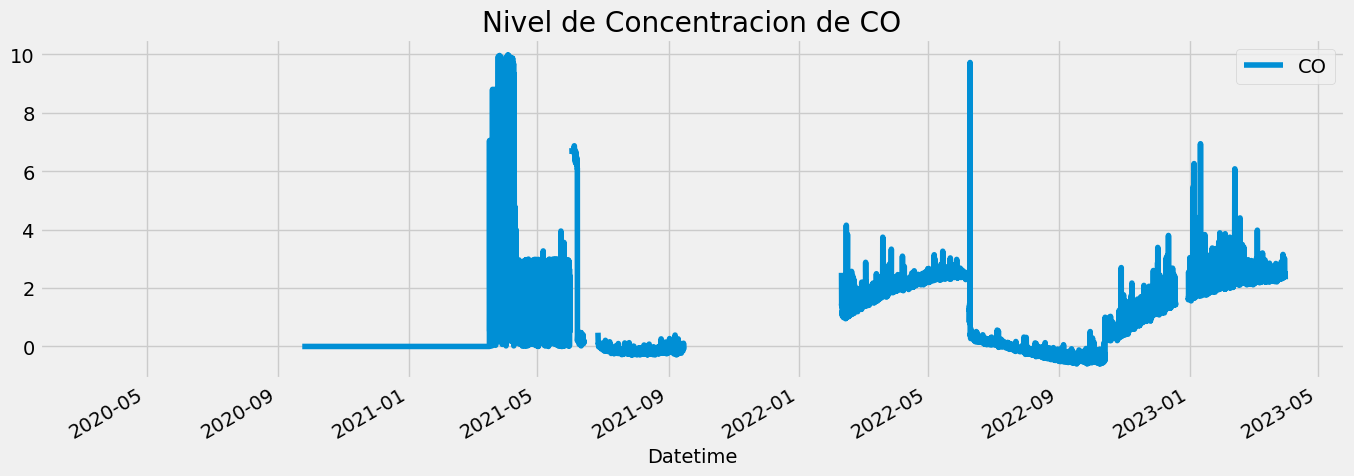

In [214]:
df.plot(style='-',
        figsize=(15, 5),
        color=color_pal[0],
        title='Nivel de Concentracion de ' + contaminante)
plt.show()

# Tiempo Pasado/Presente (Split)

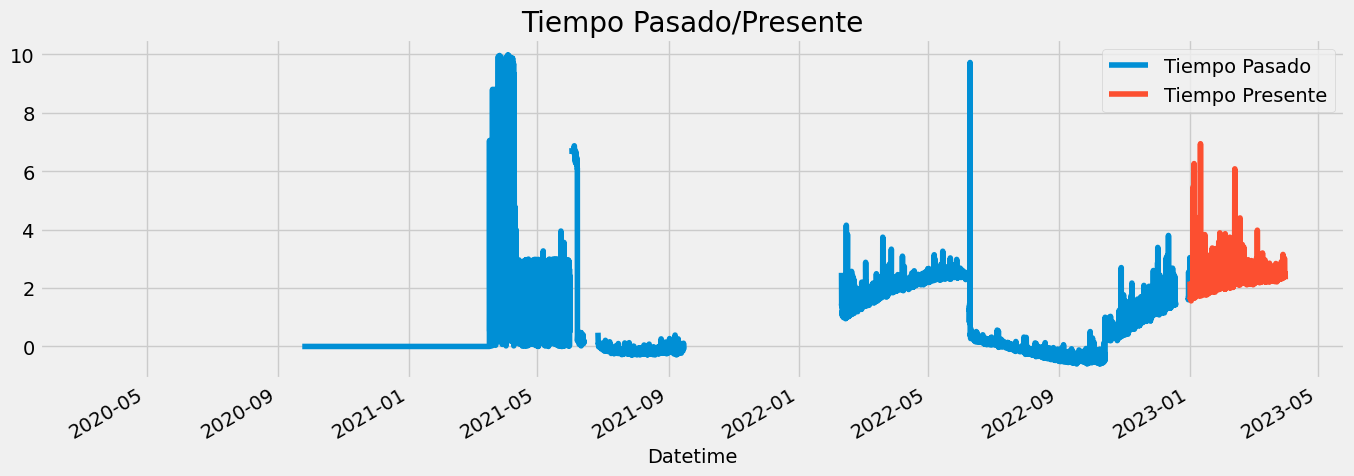

In [215]:
pasado = df.loc[df.index < '2023-01-01']
presente = df.loc[df.index >= '2023-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
pasado.plot(ax=ax, label='Serie Pasado', title='Tiempo Pasado/Presente')
presente.plot(ax=ax, label='Serie Presente')
ax.legend(['Tiempo Pasado', 'Tiempo Presente'])
plt.show()

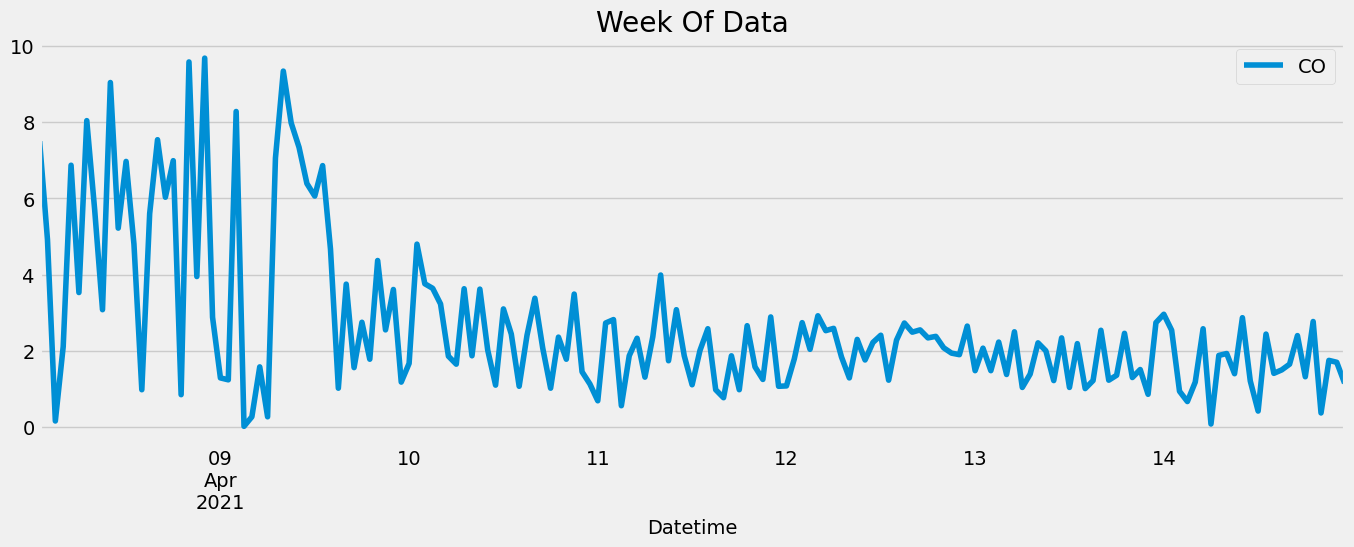

In [216]:
df.loc[(df.index > '04-08-2021') & (df.index < '04-15-2021')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# Creacion de Feature (Datetime)

In [217]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['Hora'] = df.index.hour
    df['Días de la Semana'] = df.index.dayofweek
    df['Cuartos de Año'] = df.index.quarter
    df['Meses'] = df.index.month
    df['Años'] = df.index.year
   # df['dayofyear'] = df.index.dayofyear
   # df['dayofmonth'] = df.index.day
   # df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [218]:

#sns.scatterplot(): para crear gráficos de dispersión
#sns.lineplot(): para crear gráficos de línea
#sns.barplot(): para crear gráficos de barras
#sns.histplot(): para crear histogramas
#sns.kdeplot(): para crear gráficos de densidad
#sns.boxplot(): para crear diagramas de caja
#sns.violinplot(): para crear gráficos de violín#sns.heatmap(): para crear mapas de calor


# Visualizacion de Features

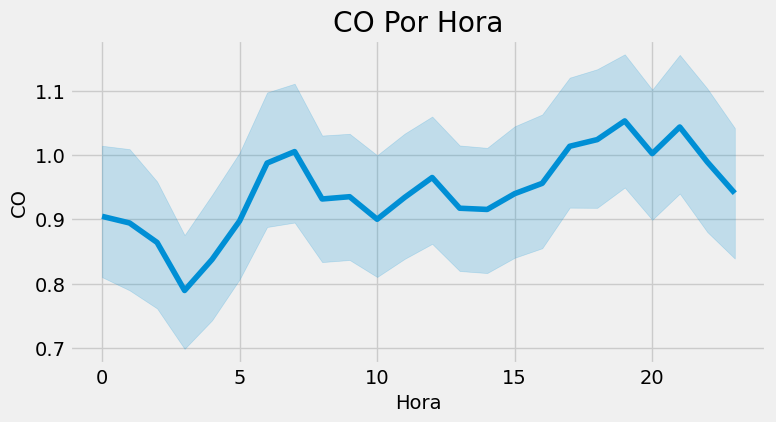

In [219]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=df, x='Hora', y= contaminante)
ax.set_title(contaminante + ' Por Hora')
plt.show()

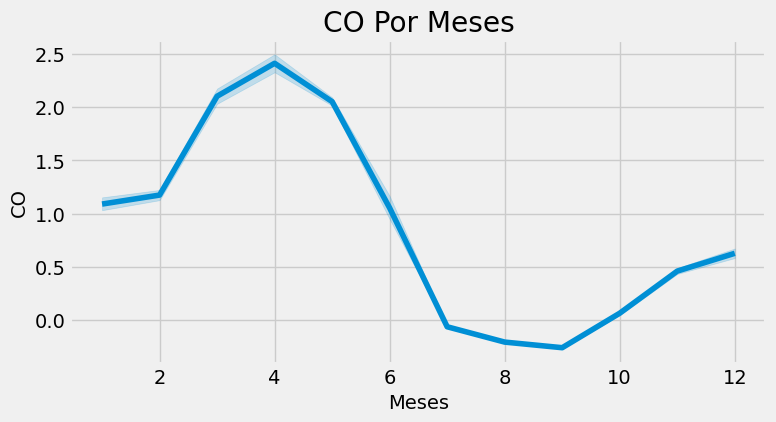

In [220]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=df, x='Meses', y= contaminante)
ax.set_title(contaminante + ' Por Meses')
plt.show()

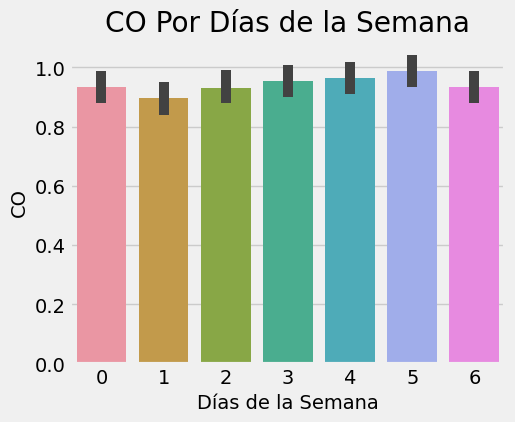

In [221]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data=df, x='Días de la Semana', y= contaminante)
ax.set_title(contaminante + ' Por Días de la Semana')
plt.show()

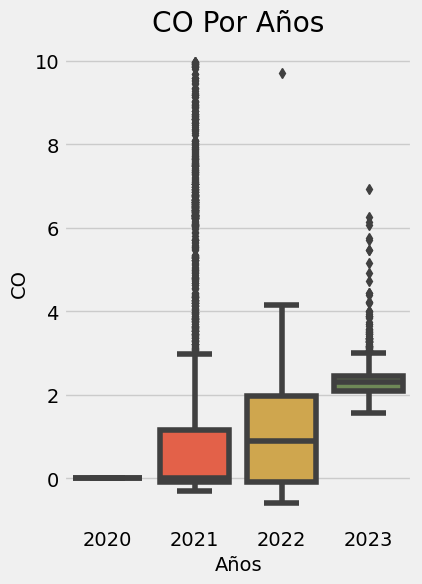

In [222]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.boxplot(data=df, x='Años', y= contaminante)
ax.set_title(contaminante + ' Por Años')
plt.show()